In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\DELL\Videos\normalization.csv'
dfn = pd.read_csv(file_path)

file_path = r'C:\Users\DELL\Videos\data.csv'
df = pd.read_csv(file_path)

# Univariate Analysis:

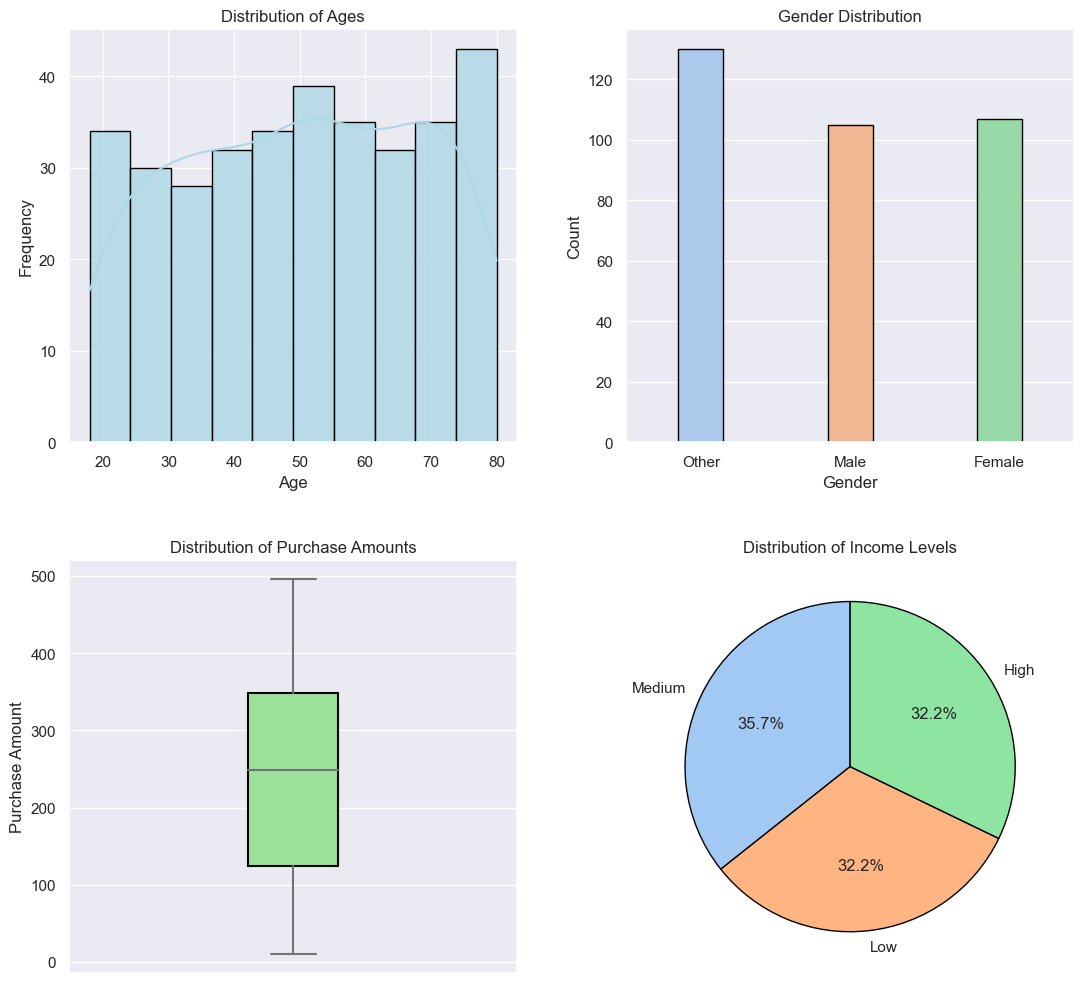

Descriptive Statistics for Purchase Amount:


,Age,Purchase_Amount,Purchase_Frequency_Per_Month
count,895.000000,895.000000,895.000000
mean,49.582123,250.094007,5.486998
std,18.124714,137.172936,2.761463
min,18.000000,10.000000,1.000000
25%,34.000000,136.500000,3.000000
50%,50.000000,250.094007,5.486998
75%,66.000000,369.000000,8.000000
max,80.000000,500.000000,10.000000


In [4]:
sns.set(rc={'figure.figsize':(11,10)}) 
sns.set(style="darkgrid")
electronics_df = df[df['Product_Category'] == 'Electronics']

# 1: Age Histogram
plt.subplot(2, 2, 1)
sns.histplot(electronics_df['Age'].astype(int), bins=10, kde=True, color='lightblue', alpha=.8, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2: Gender Bar Plot
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=electronics_df, palette='pastel', width=.3, edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3: Box Plot for Purchase Amount
plt.subplot(2, 2, 3)
sns.boxplot(y='Purchase_Amount', data=electronics_df, color='lightgreen', width=.2, boxprops=dict(edgecolor='black'))
plt.title('Distribution of Purchase Amounts')
plt.ylabel('Purchase Amount')

# 4: Pie Chart for Income Level
plt.subplot(2, 2, 4)
electronics_df['Income_Level'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, wedgeprops=dict(edgecolor='black'))
plt.title('Distribution of Income Levels')
plt.ylabel('')

plt.tight_layout(h_pad=3, w_pad=3)
plt.show()


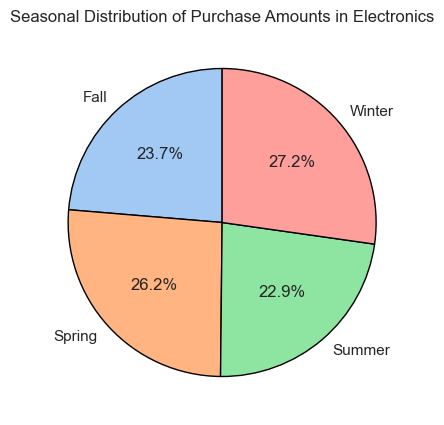

Descriptive Statistics for Purchase Amount:


,Age,Purchase_Amount,Purchase_Frequency_Per_Month
count,895.000000,895.000000,895.000000
mean,49.582123,250.094007,5.486998
std,18.124714,137.172936,2.761463
min,18.000000,10.000000,1.000000
25%,34.000000,136.500000,3.000000
50%,50.000000,250.094007,5.486998
75%,66.000000,369.000000,8.000000
max,80.000000,500.000000,10.000000


In [22]:
# Pie Chart: Seasonal Distribution of Purchase Amounts
seasonal_purchase_amounts = electronics_df.groupby('Season')['Purchase_Amount'].sum()
plt.figure(figsize=(6, 5))
plt.pie(seasonal_purchase_amounts, labels=seasonal_purchase_amounts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, wedgeprops=dict(edgecolor='black'))
plt.title('Seasonal Distribution of Purchase Amounts in Electronics')
plt.show()

#descriptive analysis
print("Descriptive Statistics for Purchase Amount:")
d = df[['Age', 'Purchase_Amount', 'Income_Level', 'Purchase_Frequency_Per_Month']].describe()
d

# Bivariate Analysis:

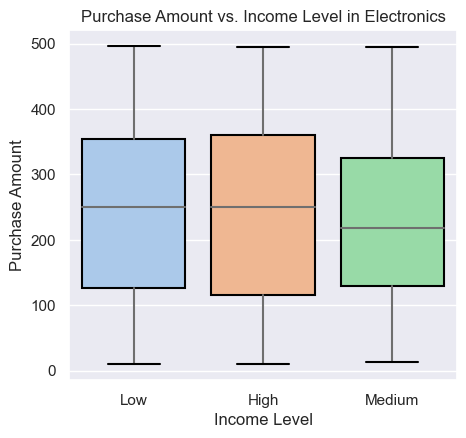

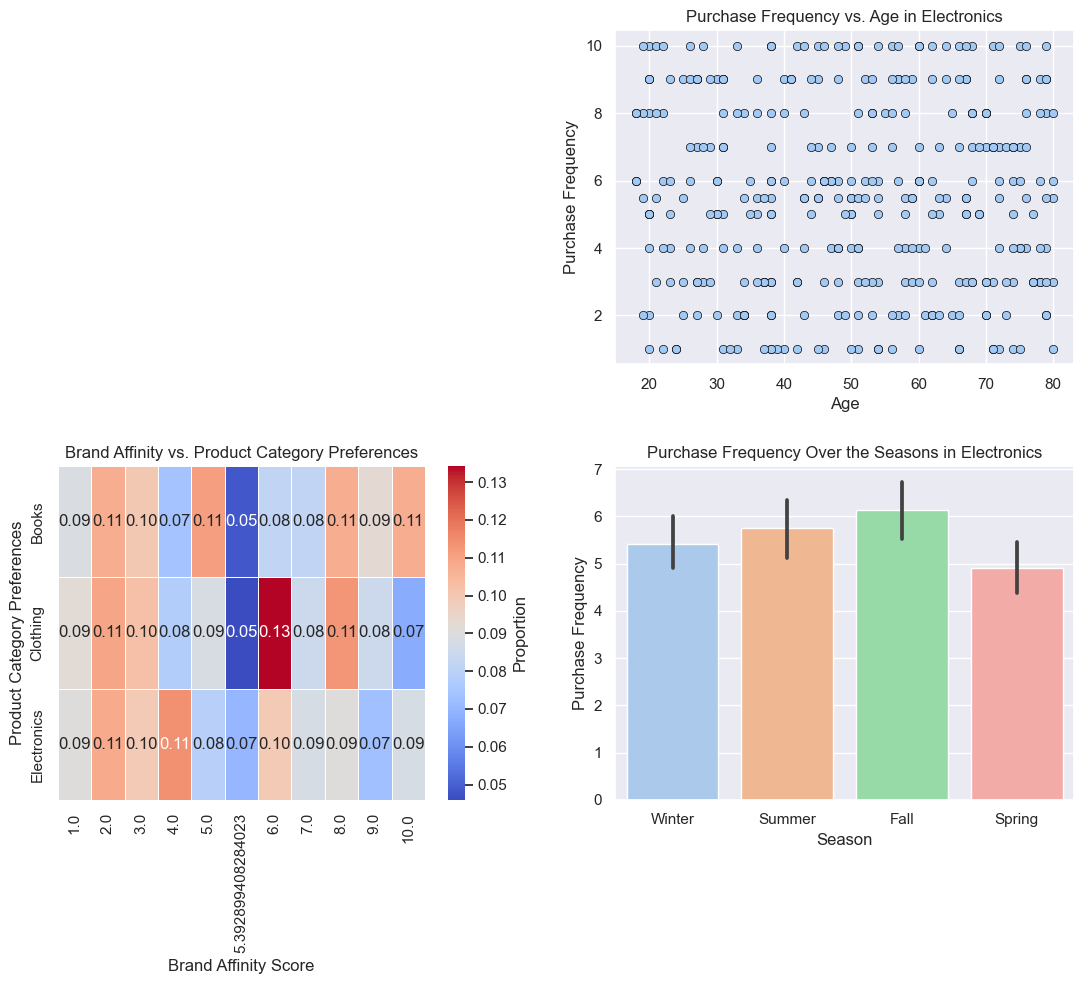

<Figure size 1100x1000 with 0 Axes>

In [19]:
pastel_palette = sns.color_palette('pastel')
border_color = 'black'
sns.set(rc={'figure.figsize': (11, 10)})
sns.set(style="darkgrid")

# 1: Purchase Amount vs. Income Level
plt.subplot(2, 2, 1)
sns.boxplot(x='Income_Level', y='Purchase_Amount', data=electronics_df, palette=pastel_palette, boxprops=dict(edgecolor=border_color), capprops=dict(color=border_color))
plt.title('Purchase Amount vs. Income Level in Electronics')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.show()

# 2: Purchase Frequency vs. Age
plt.subplot(2, 2, 2)
sns.scatterplot(x='Age', y='Purchase_Frequency_Per_Month', data=electronics_df, edgecolor=border_color, color=pastel_palette[0])
plt.title('Purchase Frequency vs. Age in Electronics')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')

# 3: Product_Category vs. Brand_Affinity_Score
plt.subplot(2, 2, 3)
heatmap_data = pd.crosstab(df['Product_Category'], df['Brand_Affinity_Score'])
heatmap_data_norm = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)
sns.heatmap(heatmap_data_norm, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Proportion'})
plt.title('Brand Affinity vs. Product Category Preferences')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category Preferences')

# 4: Purchase_Frequency_Per_Month over season (BAR CHART)
plt.subplot(2, 2, 4)
sns.barplot(x='Season', y='Purchase_Frequency_Per_Month', data=electronics_df, palette="pastel")
plt.title('Purchase Frequency Over the Seasons in Electronics')
plt.xlabel('Season')
plt.ylabel('Purchase Frequency')
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()


plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


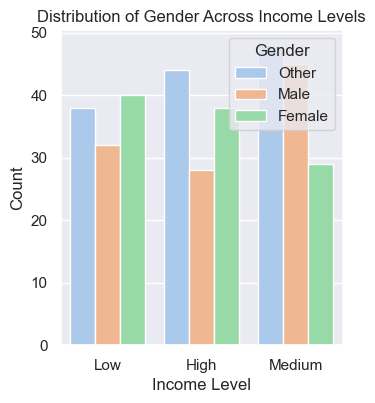

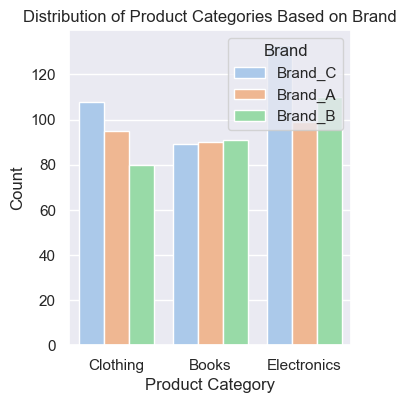

In [27]:
pastel_palette = sns.color_palette('pastel')
border_color = 'black'
sns.set(rc={'figure.figsize': (8, 9)})
sns.set(style="darkgrid")


# Bar Plot: Gender vs. Income Level
plt.subplot(2, 2, 1)
sns.countplot(x='Income_Level', hue='Gender', data=electronics_df, palette='pastel')
plt.title('Distribution of Gender Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Bar Plot: Product Category Based on Brand
plt.subplot(2, 2, 2)
sns.countplot(x='Product_Category', hue='Brand', data=df, palette='pastel')
plt.title('Distribution of Product Categories Based on Brand')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Brand', loc='upper right')
plt.show()


# Temporal Analysis:


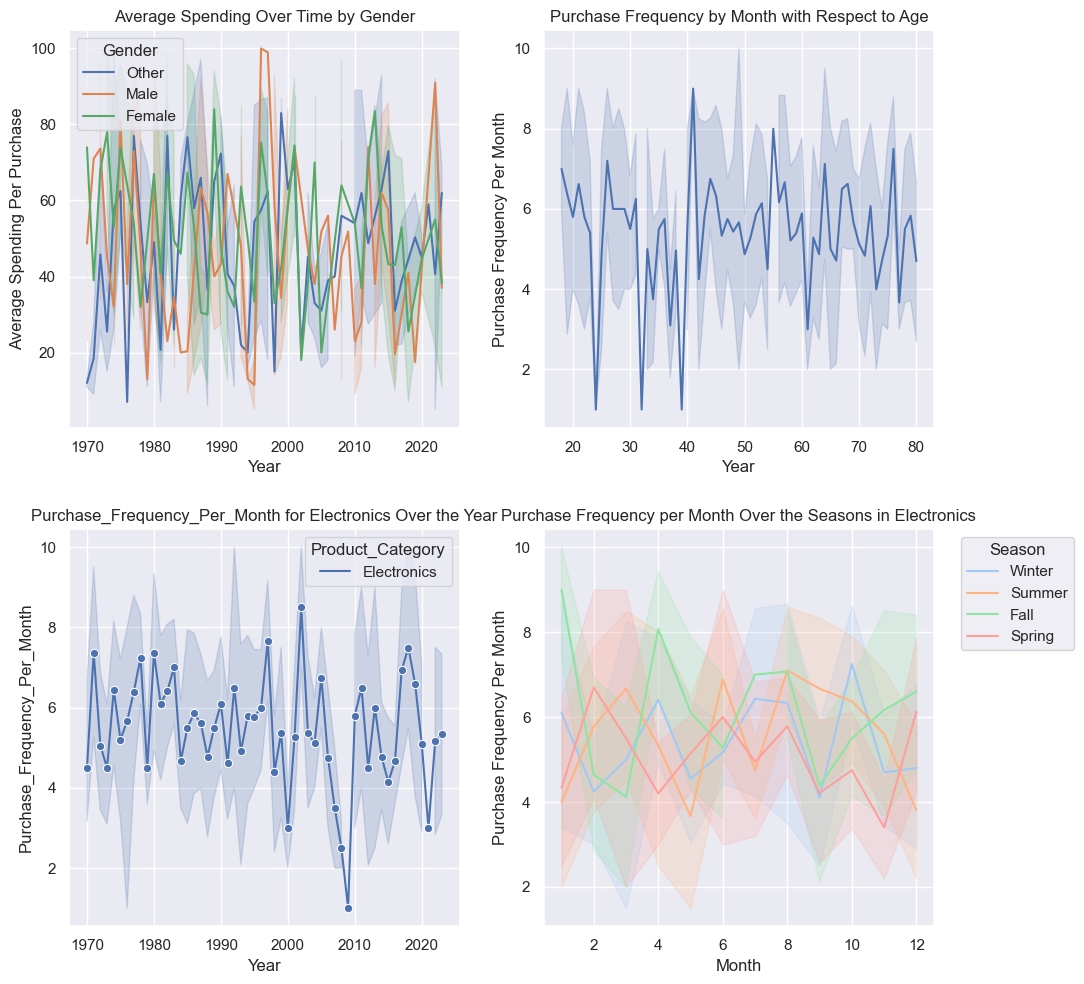

In [17]:
# Subplot 1: Average Spending Over Time by Gender
plt.subplot(2, 2, 1)
sns.lineplot(data=electronics_df, x='Year', y='Average_Spending_Per_Purchase', hue='Gender')
plt.title('Average Spending Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Average Spending Per Purchase')

# Subplot 2: Purchase Frequency by Month Over with Respect to Age
plt.subplot(2, 2, 2)
sns.lineplot(x='Age', y='Purchase_Frequency_Per_Month', data=electronics_df)
plt.title('Purchase Frequency by Month with Respect to Age')
plt.xlabel('Year')
plt.ylabel('Purchase Frequency Per Month')

# Subplot 3: Purchase Amount of Electronics Over the Year
plt.subplot(2, 2, 3)
sns.lineplot(x='Year', y='Purchase_Frequency_Per_Month', hue='Product_Category', data=electronics_df, marker='o')
plt.title('Purchase_Frequency_Per_Month for Electronics Over the Year')
plt.xlabel('Year')
plt.ylabel('Purchase_Frequency_Per_Month')

# Subplot 4: Yearly Performance Comparison (BAR CHART)
plt.subplot(2, 2, 4)
sns.lineplot(x='Month', y='Purchase_Frequency_Per_Month', hue='Season', data=electronics_df,  palette="pastel")
plt.title('Purchase Frequency per Month Over the Seasons in Electronics')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency Per Month')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(h_pad=2, w_pad=2)

plt.show()

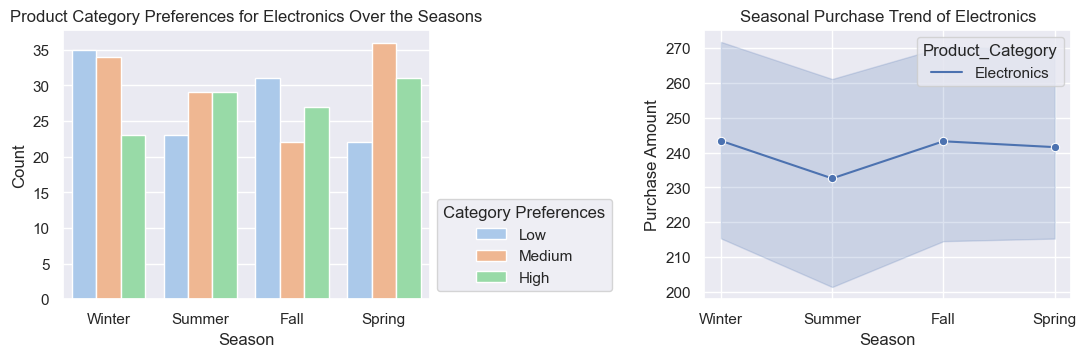

In [14]:
# Subplot 5: Purchase Frequency of Each Brand Over Time
plt.subplot(3, 2, 5)
sns.countplot(x='Season', hue='Product_Category_Preferences', data=electronics_df, palette="pastel")
plt.title('Product Category Preferences for Electronics Over the Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Category Preferences', bbox_to_anchor=(1, .4), loc='upper left')

# Subplot 6: Seasonal Purchase Trend by Product Category
plt.subplot(3, 2, 6)
sns.lineplot(x='Season', y='Purchase_Amount', hue='Product_Category', data=electronics_df, marker='o')
plt.title('Seasonal Purchase Trend of Electronics')
plt.xlabel('Season')
plt.ylabel('Purchase Amount')


plt.tight_layout(h_pad=2, w_pad=2)
plt.show()